# **Catas and dogs dataset**
---

- 강아지와 고양이 이미지 이진분류 task
- 사전 훈련된 컨브넷 사용

In [ ]:
import keras
keras.__version__

'2.6.0'

## VGG16 model load

In [ ]:
import keras
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## Conv_base 모델 확장해 end-to-end로 학습

In [ ]:
from keras import models, layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


## 모델 커파일 전 합성곱 기반층 동결시키기
- top layer의 dense 층은 랜덤하게 초기화되었기 때문에 매우 큰 가중치 업데이트 값이 전파
- 이는 사전에 학습된 표현을 크게 훼손
- 이를 방지하기 위해 동결

In [ ]:
print("conv_base 동결 전 훈련되는 가중치 수 : ", len(model.trainable_weights))
conv_base.trainable = False
print("conv_base 동결 후 훈련되는 가중치 수 : ", len(model.trainable_weights))

conv_base 동결 전 훈련되는 가중치 수 :  30
conv_base 동결 후 훈련되는 가중치 수 :  4


## 훈련, 검증, 테스트 폴더로 이미지 복사하기

In [ ]:
# 구글드라이브 Colab에 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/고급딥러닝HW/datasets

/content/drive/MyDrive/Colab Notebooks/고급딥러닝HW/datasets


In [ ]:
import os, shutil

# 원본 데이터셋을 압축 해제한 경로
original_dataset_dir = '/content/drive/MyDrive/Colab Notebooks/고급딥러닝HW/datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉토리
base_dir = '/content/drive/MyDrive/Colab Notebooks/고급딥러닝HW/datasets/cat_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
# 훈련용 고양이 사진 디렉토리
train_cats_dir = os.path.join(train_dir, 'cats')
# 훈련용 강아지 사진 디렉토리
train_dogs_dir = os.path.join(train_dir, 'dogs')
# 검증용 고양이 사진 디렉토리
validation_cats_dir = os.path.join(validation_dir, 'cats')
# 검증용 강아지 사진 디렉토리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# 테스트용 고양이 사진 디렉토리
test_cats_dir = os.path.join(test_dir, 'cats')
# 테스트용 강아지 사진 디렉토리
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
os.mkdir(base_dir)
# 훈련, 검증, 테스트 분할
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [ ]:
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)
# 처음 1000개의 고양이 이미지 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

# 처음 1000개의 강아지 이미지 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

# 다음 500개의 강아지 이미지 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

# 다음 500개의 강아지 이미지 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
import os

print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500



## 데이터 증식을 사용해 모델 훈련

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어선 안됨!!!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
      #타깃 티렉토리
      train_dir,
      # 모든 이미지의 크기를 150X150으로 변경
      target_size=(150,150),
      batch_size=20,
      # binary_crossentropy 손실 사용하므로 이진 레이블 필요
      class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 - 29s - loss: 0.5930 - acc: 0.7175 - val_loss: 0.4862 - val_acc: 0.8350
Epoch 2/30
100/100 - 27s - loss: 0.4632 - acc: 0.8200 - val_loss: 0.3969 - val_acc: 0.8550
Epoch 3/30
100/100 - 27s - loss: 0.3976 - acc: 0.8485 - val_loss: 0.3406 - val_acc: 0.8740
Epoch 4/30
100/100 - 27s - loss: 0.3632 - acc: 0.8555 - val_loss: 0.3137 - val_acc: 0.8770
Epoch 5/30
100/100 - 27s - loss: 0.3314 - acc: 0.8670 - val_loss: 0.2968 - val_acc: 0.8800
Epoch 6/30
100/100 - 27s - loss: 0.3166 - acc: 0.8725 - val_loss: 0.2872 - val_acc: 0.8940
Epoch 7/30
100/100 - 27s - loss: 0.3074 - acc: 0.8730 - val_loss: 0.2759 - val_acc: 0.8870
Epoch 8/30
100/100 - 27s - loss: 0.2916 - acc: 0.8810 - val_loss: 0.2651 - val_acc: 0.8940
Epoch 9/30
100/100 - 27s - loss: 0.2801 - acc: 0.8865 - val_loss: 0.2680 - val_acc: 0.8930
Epoch 10/30
100/100 - 27s - loss: 0.2700 - acc: 0.8955 - val_loss: 0.2530 - val_acc: 0.8980
Epoch 11/30
100/100 - 27s - loss: 0.2668 - acc: 0.8905 - val_loss: 0.2492 - val_acc: 0.89

모델 저장

In [ ]:
model.save('cats_and_dogs_small_3.h5')

## 결과 그래프

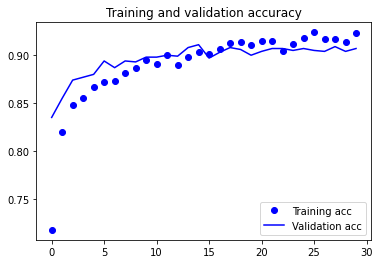

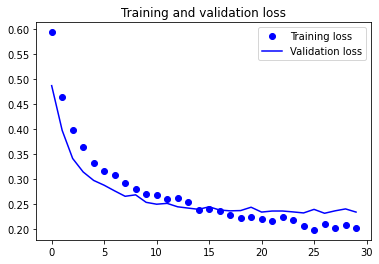

In [ ]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 미세 조정(fine-tuning)
1. 사전 훈련된 기반 네트워크 위에 새로운 네트워크 추가
2. 기반 네트워크 동결
3. 새로 추가한 네트워크 훈련
4. 기반 네트워크에서 일부 층의 동결 해제
5. 동결 해제한 층과 새로 추가한 층 함께 훈련

3번까지의 과정은 위에서 특성 추출 시 이미 완료했으므로 4부터 진행

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

- 미세 조정 시작
- 학습률을 낮춘 RMSProp 옵티마이저 사용
- 기반 네트워크에서 학습된 표현을 해치지 않는 선에서 조금씩 수정하기 위해 학습률 낮춤

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 31s 289ms/step - loss: 0.2064 - acc: 0.9110 - val_loss: 0.2129 - val_acc: 0.9190
Epoch 2/100
100/100 [==============================] - 29s 287ms/step - loss: 0.1699 - acc: 0.9340 - val_loss: 0.2207 - val_acc: 0.9110
Epoch 3/100
100/100 [==============================] - 30s 296ms/step - loss: 0.1548 - acc: 0.9365 - val_loss: 0.1962 - val_acc: 0.9160
Epoch 4/100
100/100 [==============================] - 30s 295ms/step - loss: 0.1288 - acc: 0.9460 - val_loss: 0.2001 - val_acc: 0.9260
Epoch 5/100
100/100 [==============================] - 29s 288ms/step - loss: 0.1116 - acc: 0.9605 - val_loss: 0.1997 - val_acc: 0.9270
Epoch 6/100
100/100 [==============================] - 29s 289ms/step - loss: 0.1070 - acc: 0.9605 - val_loss: 0.2017 - val_acc: 0.9220
Epoch 7/100
100/100 [==============================] - 29s 289ms/step - loss: 0.0957 - acc: 0.9630 - val_loss: 0.2105 - val_acc: 0.9240
Epoch 8/100
100/100 [===========================

In [ ]:
model.save('cats_and_dogs_small_4.h5')

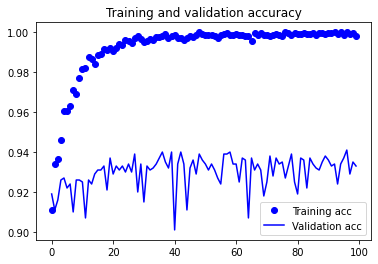

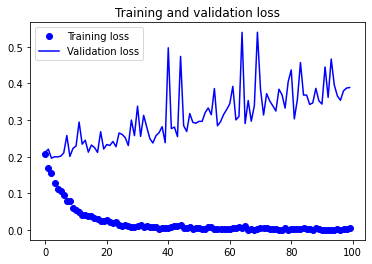

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

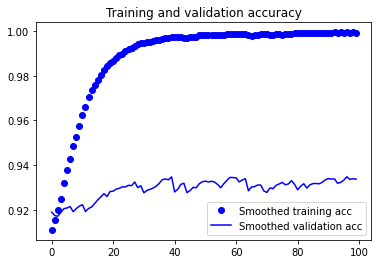

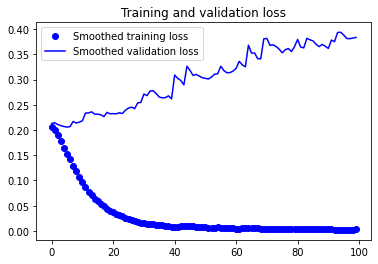

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9290000200271606


## Conclusion

- maximum acc = 0.93
- feature extraction + data augmentation + fine-tuning